In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp

In [8]:
transactions = pd.read_csv("transactions_v2.csv")
members = pd.read_csv('members_v3.csv')
train = pd.read_csv("train_v2.csv")
test = pd.read_csv("sample_submission_v2.csv")
user = pd.read_csv("user_logs_v2.csv")

# Analysis on Training data set 

In [13]:
train.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [14]:
train.shape

(970960, 2)

In [15]:
# checking for any null values in the DataFrame
train.isnull().values.any()

False

In [16]:
# checking for duplicate value in the dataframe
train.duplicated().any()

False

Text(0.5, 1.0, 'Class label distribution')

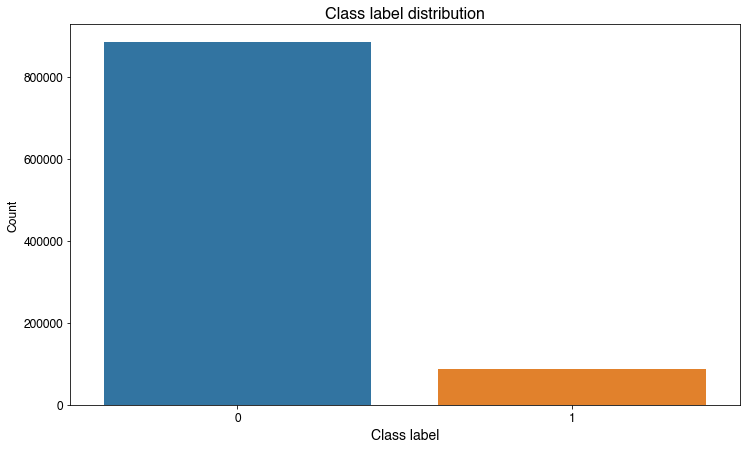

In [27]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data=train, x='is_churn')
plt.xticks(size=12)
plt.xlabel('Class label', size=14)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Class label distribution', size=16)

The training dataset is unbalanced, there are a lot of non-churned useres compared to those who churned. 




# Analysis on Members data

In [32]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [33]:
members.shape

(6769473, 6)

In [34]:
train_members = pd.merge(train, members, on = "msno" , how = "left")
train_members.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0


In [35]:
train_members.shape

(970960, 7)

In [36]:
train_members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 59.3+ MB


In [37]:
train_members.duplicated("msno").sum()

0

In [20]:
train_members.isnull().sum()

msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

### City

In [23]:
train_members['city'].value_counts()

1.0     442598
13.0     97136
5.0      70706
4.0      47227
15.0     43187
22.0     41991
6.0      26066
14.0     20013
12.0     11383
9.0       9526
11.0      9138
18.0      7792
8.0       7589
10.0      6470
17.0      5476
21.0      5199
3.0       5057
7.0       2652
16.0       944
20.0       677
19.0       140
Name: city, dtype: int64

In [39]:
kk = train_members[train_members["city"].notna()]

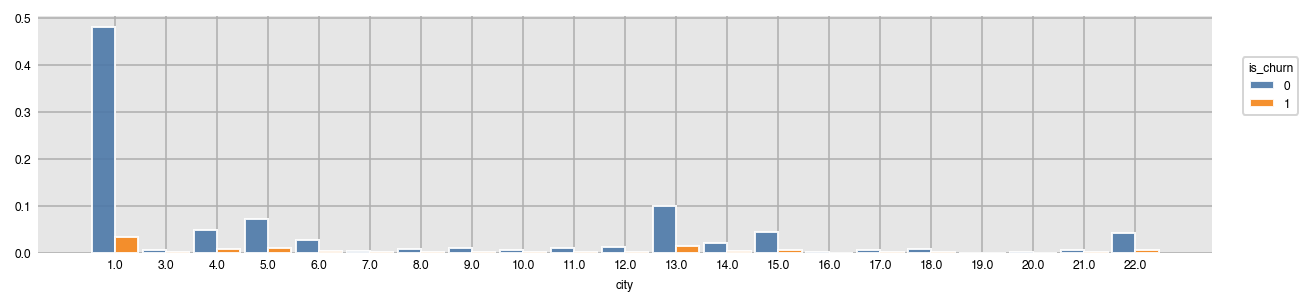

In [40]:
dxp.count('city', data=kk, split='is_churn', normalize=True)

In [46]:
temp = pd.DataFrame(train_members.groupby("city")["is_churn"].agg(lambda x: x.eq(1).sum())).reset_index()

In [47]:
temp['total_users'] = pd.DataFrame(train_members.groupby("city")["is_churn"].agg(total_users='count')).reset_index()['total_users']

In [48]:
temp['average_churned_users'] = pd.DataFrame(train_members.groupby("city")["is_churn"].agg(average_churned_users='mean')).reset_index()['average_churned_users']

In [49]:
temp.sort_values(by=['total_users'],inplace=True, ascending=False)

In [50]:
temp

,city,is_churn,total_users,average_churned_users
0,1.0,28351,442598,0.064056
11,13.0,11950,97136,0.123023
3,5.0,9333,70706,0.131997
2,4.0,6094,47227,0.129036
13,15.0,5538,43187,0.128233
20,22.0,5284,41991,0.125836
4,6.0,3358,26066,0.128827
12,14.0,2370,20013,0.118423
10,12.0,1585,11383,0.139243
7,9.0,1200,9526,0.125971


### Birthday

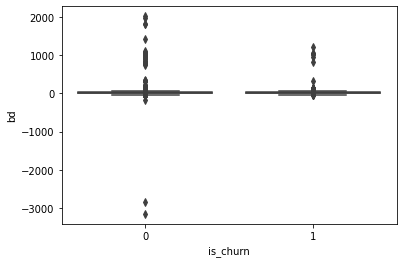

In [26]:
sns.boxplot(x='is_churn', y='bd', data=train_members)

In [68]:
train_members['bd'] = train_members['bd'].apply(lambda x: x if (x < 85.0) and (x > 5.0) else np.nan)

In [72]:
# Delete outliers 
bins = np.arange(1, 10) * 10
train_members['category'] = np.digitize(train_members['bd'], bins, right=True)

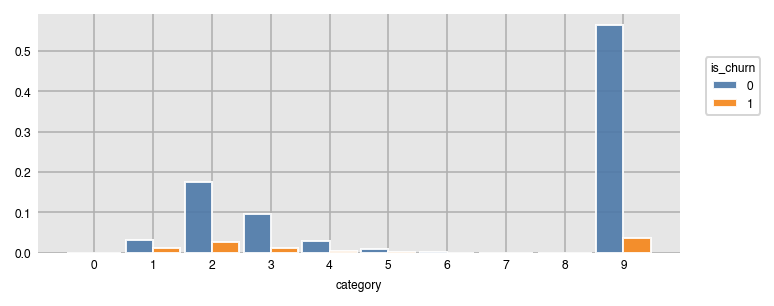

In [73]:
dxp.count('category', data=train_members, split='is_churn', normalize=True)

### Gender 

In [74]:
train_members['gender'].unique()

array(['male', nan, 'female'], dtype=object)

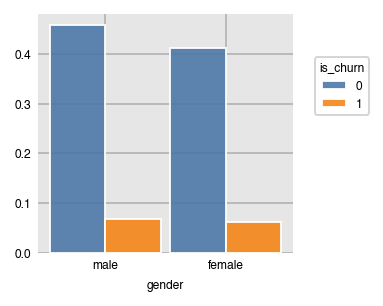

In [75]:
dxp.count('gender', data=train_members, split='is_churn', normalize=True)

By looking at the average churning rate for both the gender types it is almost same.

### Registred via

In [32]:
train_members['registered_via'].unique()

array([ 3.,  7.,  9., nan,  4., 13.])

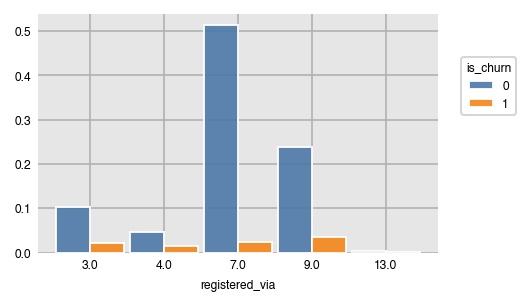

In [76]:
dxp.count('registered_via', data=train_members, split='is_churn', normalize=True)

TODO : Since there is no registration category with the value 0, hence I can impute 0 in place of nan at the data preprocessing.

## registration_init_time

In [77]:
train_members['registration_init_time'] = pd.to_datetime(train_members['registration_init_time'], format='%Y%m%d')

In [78]:
train_members['year'] = train_members['registration_init_time'].dt.year.values
train_members['month'] = train_members['registration_init_time'].dt.month.values
train_members['weekday'] = train_members['registration_init_time'].dt.weekday.values

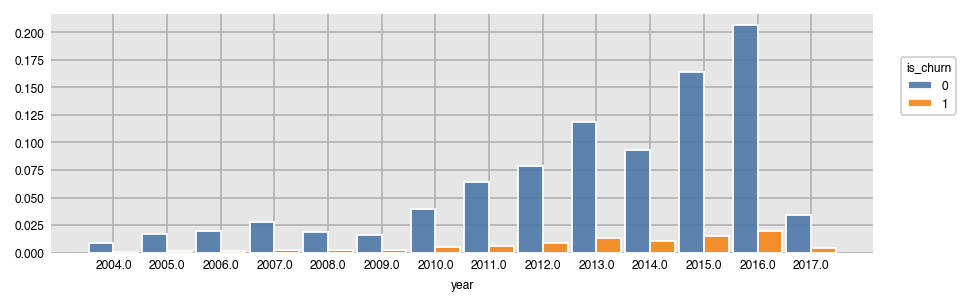

In [79]:
dxp.count('year', data=train_members, split='is_churn', normalize=True)

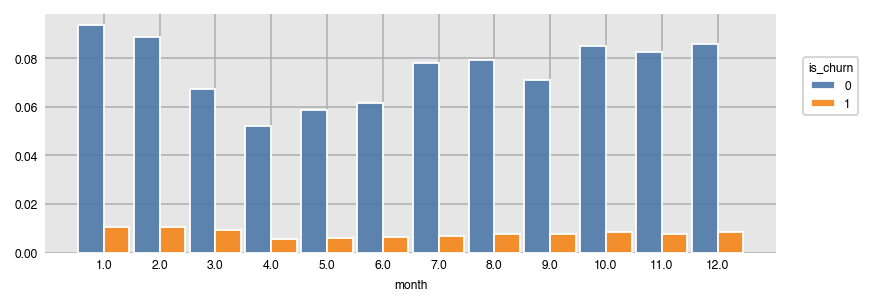

In [80]:
dxp.count('month', data=train_members, split='is_churn', normalize=True)

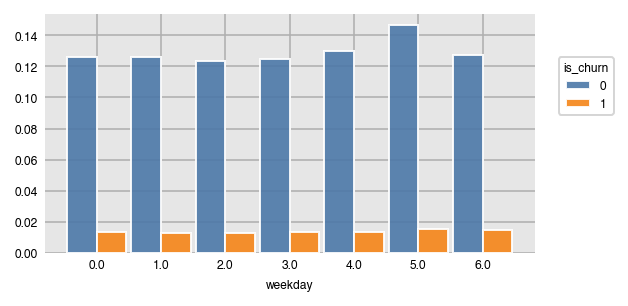

In [81]:
dxp.count('weekday', data=train_members, split='is_churn', normalize=True)

In [82]:
dates = list(train_members.sort_values('registration_init_time')['registration_init_time'])
print(dates[len(dates)//2])

2015-02-04 00:00:00


### All in one 

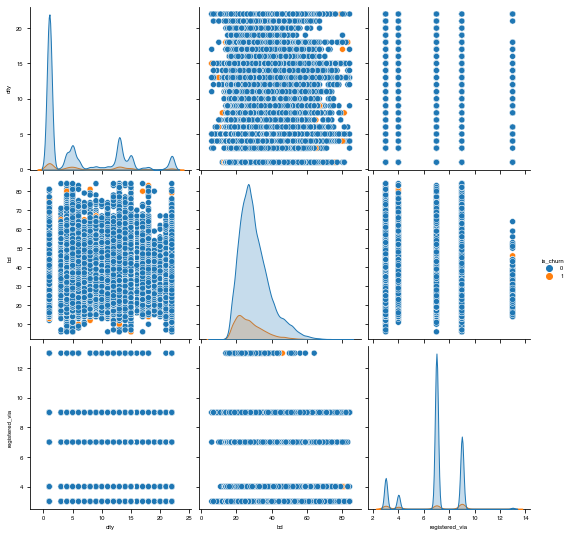

In [84]:
sns.pairplot(train_members, vars=['city', 'bd', 'registered_via'], hue='is_churn')

# Transactions

In [85]:
transactions.shape

(1431009, 9)

In [ ]:
transactions.duplicated("msno").sum()

In [ ]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], format='%Y%m%d')

In [ ]:
transactions = transactions.sort_values(by=['transaction_date'])
transactions = transactions.drop_duplicates(subset=['msno'], keep='last')

In [ ]:
transactions.shape

In [ ]:
train.shape

In [ ]:
train_transactions = pd.merge(train, transactions, on='msno', how='left')

In [ ]:
train_transactions.shape

In [ ]:
train_transactions.info()

In [ ]:
transactions.duplicated("msno").any()

In [ ]:
train.duplicated().any()

In [ ]:
train_transactions.isnull().sum()


In [ ]:
train_transactions['payment_method_id'].unique()

In [ ]:
sns.countplot(data=train_transactions, x='payment_method_id',hue='is_churn')

In [ ]:
dxp.count('payment_method_id', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
train_transactions['payment_plan_days'].unique()

In [ ]:
dxp.count('payment_plan_days', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
sns.boxplot(x='is_churn', y='payment_plan_days', data=train_transactions)

In [ ]:
# check how they define payment_plan_days to define whats an outlier 

In [ ]:
train_transactions['plan_list_price'].unique()

In [ ]:
dxp.count('plan_list_price', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
sns.boxplot(x='is_churn', y='plan_list_price', data=train_transactions)

In [ ]:
# Delete outliers 

In [ ]:
train_transactions['actual_amount_paid'].unique()

In [ ]:
dxp.count('actual_amount_paid', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
sns.boxplot(x='is_churn', y='actual_amount_paid', data=train_transactions)

In [ ]:
# Delete Outliers 

In [ ]:
train_transactions['is_auto_renew'].unique()

In [ ]:
dxp.count('is_auto_renew', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
# Replace Nan Values 

In [ ]:
train_transactions['year'] = train_transactions['transaction_date'].dt.year.values
train_transactions['month'] = train_transactions['transaction_date'].dt.month.values

In [ ]:
dxp.count('year', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
dxp.count('month', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
# Delete outliers and Nan values 

In [ ]:
train_transactions['membership_expire_date'] = pd.to_datetime(train_transactions['membership_expire_date'], format='%Y%m%d')
train_transactions['ex_year'] = train_transactions['membership_expire_date'].dt.year.values
train_transactions['ex_month'] = train_transactions['membership_expire_date'].dt.month.values


In [ ]:
dxp.count('ex_year', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
dxp.count('ex_month', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
train_transactions['is_cancel'].unique()

In [ ]:
dxp.count('is_cancel', data=train_transactions, split='is_churn', normalize=True)

In [ ]:
sns.pairplot(train_transactions, vars=['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'is_auto_renew', 'is_cancel'], height=2, hue='is_churn')


In [ ]:
user.head()

In [ ]:
user.shape

In [ ]:
user.duplicated("msno").sum()

In [ ]:
user = user.groupby('msno',as_index=False).sum()
user.drop(columns=['date'],axis=1,inplace=True)
user.head()

In [ ]:
user.shape

In [ ]:
user.duplicated("msno").sum()

In [ ]:
train_user = pd.merge(train, user, on='msno', how='left')

In [ ]:
train_user.shape

In [ ]:
train_user.isnull().sum()

In [ ]:
train_user.duplicated("msno").sum()

In [ ]:
sns.boxplot(x='is_churn', y='num_25', data=train_user)

# HI BEBE

In [ ]:
sns.pairplot(train_logs, vars=['num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs'], hue='is_churn')